# Whole Image Quality Control Report

## Import libraries

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(arrow))
suppressPackageStartupMessages(library(RColorBrewer))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”


## Set paths and variables

In [2]:
# Paths to CSV files to generate QC report
path_to_qc_results <- file.path("../Corrected_Images/Corrected_Plate_5/IC_QC_RunImage.csv")

# Output path for bar chart
barchart_output_file <- file.path(paste0("./qc_figures/Plate_5_flagged_fov_per_well_chart.png"))

# Output path for platemap
platemap_output_file <- file.path(paste0("./qc_figures/Plate_5_platemap_flagged_fov_per_well.png"))

# Output path for site bar plot
site_FOV_output_file <- file.path(paste0("./qc_figures/Plate_5_per_site_flagged_fov.png"))

## Load in outlier and quality control results

In [3]:
# Read in CSV files
qc_df <- read.csv(path_to_qc_results)

dim(qc_df)
head(qc_df)

[1] 1512  110

,Channel_OrigDAPI,Channel_OrigGFP,Channel_OrigMito,Channel_OrigRFP,ExecutionTime_01Images,ExecutionTime_02Metadata,ExecutionTime_03NamesAndTypes,ExecutionTime_04Groups,ExecutionTime_05MeasureImageQuality,ExecutionTime_06FlagImage,⋯,Series_OrigMito,Series_OrigRFP,URL_OrigDAPI,URL_OrigGFP,URL_OrigMito,URL_OrigRFP,Width_OrigDAPI,Width_OrigGFP,Width_OrigMito,Width_OrigRFP
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,-1,-1,-1,-1,0,0,1.14,0,1.07,0,⋯,0,0,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_1_10_DAPI_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_2_10_GFP_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_3_10_CY5_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_4_10_RFP_001.tif,1224,1224,1224,1224
2,-1,-1,-1,-1,0,0,1.35,0,1.13,0,⋯,0,0,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_1_11_DAPI_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_2_11_GFP_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_3_11_CY5_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_4_11_RFP_001.tif,1224,1224,1224,1224
3,-1,-1,-1,-1,0,0,0.67,0,1.21,0,⋯,0,0,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_1_12_DAPI_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_2_12_GFP_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_3_12_CY5_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_4_12_RFP_001.tif,1224,1224,1224,1224
4,-1,-1,-1,-1,0,0,0.60,0,1.13,0,⋯,0,0,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_1_13_DAPI_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_2_13_GFP_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_3_13_CY5_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_4_13_RFP_001.tif,1224,1224,1224,1224
5,-1,-1,-1,-1,0,0,0.45,0,1.10,0,⋯,0,0,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_1_14_DAPI_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_2_14_GFP_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_3_14_CY5_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_4_14_RFP_001.tif,1224,1224,1224,1224
6,-1,-1,-1,-1,0,0,0.54,0,1.03,0,⋯,0,0,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_1_15_DAPI_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_2_15_GFP_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_3_15_CY5_001.tif,file:/home/jenna/nf1_cellpainting_data/0.download_data/Plate_5/B10_01_4_15_RFP_001.tif,1224,1224,1224,1224


## Generate data frame removing poor quality sites and counting the number of sites left per well

In [4]:
# Count the number of flagged image sets
flagged_image_sets <- sum(qc_df$Image_Quality_Control_QC_Flag == 1)

well_flag_counts <- qc_df %>%
  group_by(Metadata_Well) %>%
  summarise(FlaggedFOVs = sum(Image_Quality_Control_QC_Flag))

# Print the number of image sets flagged and not processed
print(flagged_image_sets)
# Print the table
head(well_flag_counts)


[1] 86


Metadata_Well,FlaggedFOVs
<chr>,<int>
B1,1
B10,0
B11,0
B12,1
B2,1
B3,2


## Generate bar chart to show how many FOVs were flagged after QC

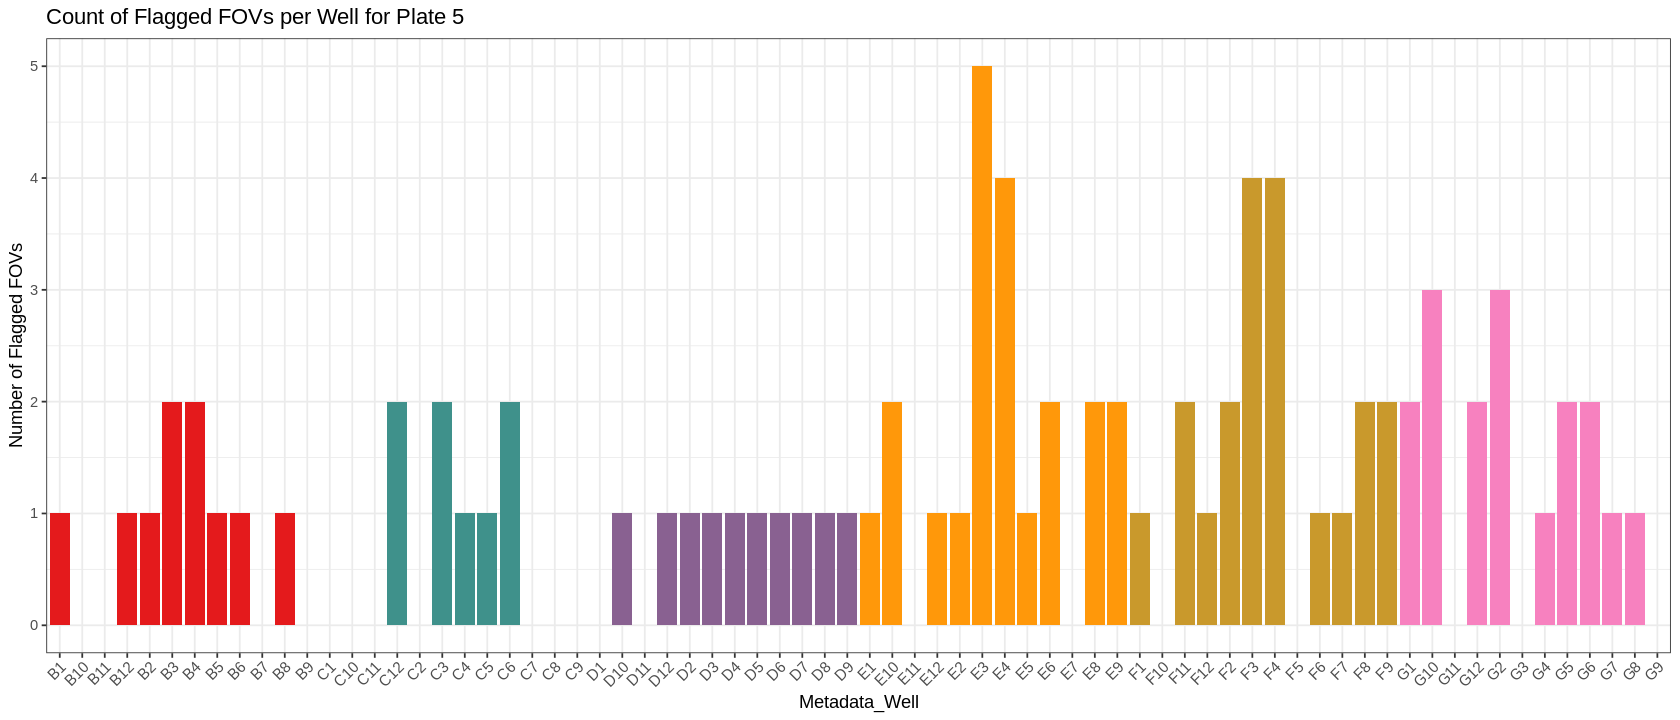

In [5]:
# Extract the first letter from 'Metadata_Well' to create a color palette
unique_starting_letters <- unique(substr(well_flag_counts$Metadata_Well, 1, 1))

# Create a color palette based on unique starting letters
color_palette <- colorRampPalette(brewer.pal(8, "Set1"))(length(unique_starting_letters))

# Map each unique starting letter to a color in a named vector
color_dict <- setNames(color_palette, unique_starting_letters)

# Create a new column 'Color' in the data frame based on the starting letter
well_flag_counts$Color <- color_dict[substr(well_flag_counts$Metadata_Well, 1, 1)]

# Increase the figure size to extend the chart horizontally
options(repr.plot.width=14, repr.plot.height=6)

# Create a bar chart using ggplot2 with the 'Color' column for colors
fov_chart <- ggplot(well_flag_counts, aes(x = Metadata_Well, y = FlaggedFOVs, fill = Color)) +
  geom_bar(stat = 'identity') +
  labs(x = 'Metadata_Well', y = 'Number of Flagged FOVs', title = 'Count of Flagged FOVs per Well for Plate 5') +
  scale_fill_identity() +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save plot to qc_figures
ggsave(
        barchart_output_file,
        fov_chart,
        dpi = 500,
        height = 6,
        width = 10
    )

# Display the plot in the notebook
print(fov_chart)


## Generate plate map to show distribution of flagged FOVs from QC

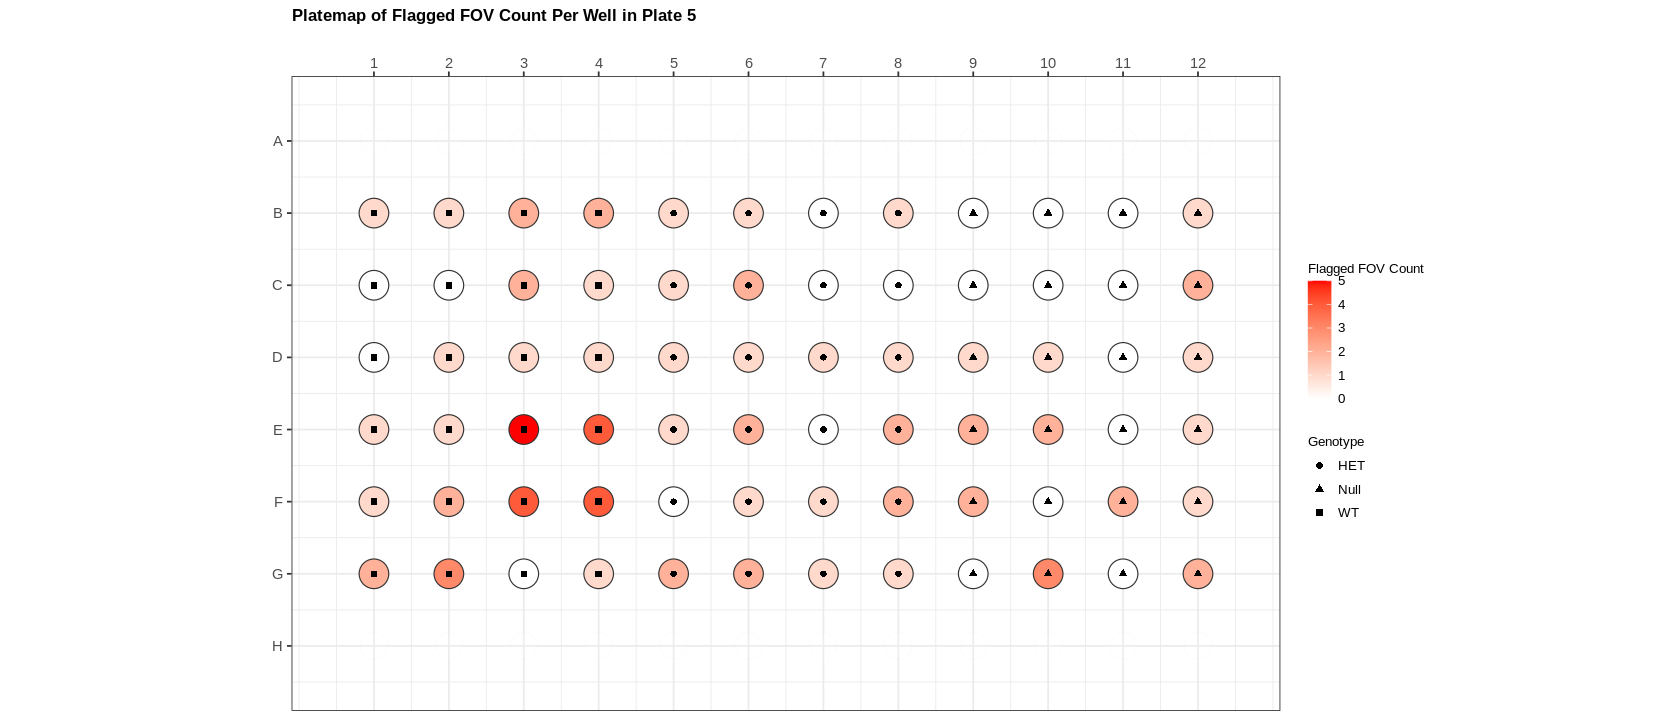

In [6]:
# Add genotype to data frame to label on plot
well_flag_counts <- well_flag_counts %>%
  mutate(
    Metadata_genotype = case_when(
      as.numeric(gsub("\\D", "", Metadata_Well)) %in% 1:4 ~ "WT",
      as.numeric(gsub("\\D", "", Metadata_Well)) %in% 5:8 ~ "HET",
      as.numeric(gsub("\\D", "", Metadata_Well)) %in% 9:12 ~ "Null",
    )
  )

fov_platemap <- platetools::raw_map(
    data = well_flag_counts$FlaggedFOVs,
    well = well_flag_counts$Metadata_Well,
    plate = 96,
    size = 8
    ) +

    ggtitle(paste("Platemap of Flagged FOV Count Per Well in Plate 5")) +
    geom_point(aes(shape = well_flag_counts$Metadata_genotype)) +
    scale_shape_discrete(name = "Genotype") +
    scale_fill_gradient(
      name = "Flagged FOV Count",
      low = "white",
      high = "red",
    ) +
    theme(
    plot.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 8),  # Adjust the text size
    legend.title = element_text(size = 8),  # Adjust the title size
    legend.key.size = unit(0.5, "cm")      # Adjust the key size
  )

    ggsave(
    platemap_output_file,
    fov_platemap,
    dpi = 500,
    height = 3.5,
    width = 6
    )

# Display the plot in the notebook
print(fov_platemap)

## Count of flagged FOVs based on site number

In [7]:
# Replace 'path_to_qc_results' with your actual data frame name
flagged_qc_df <- qc_df[qc_df$Image_Quality_Control_QC_Flag == 1, ]

dim(flagged_qc_df)

# Example using viridis palette
site_FOV_plot <- ggplot(flagged_qc_df, aes(x = factor(Metadata_Site))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Count Plot of Site Integers",
       x = "Site",
       y = "Count")

# Save plot to qc_figures
ggsave(
        site_FOV_output_file,
        site_FOV_plot,
        dpi = 500,
        height = 6,
        width = 10
    )

[1]  86 110

## Determine how many misclassified cells match with flagged images from QC (from training ML without QC)

In [8]:
# Load the parquet file into misclassed_df
misclassed_df <- arrow::read_parquet("./misclassified_cells.parquet")

dim(misclassed_df)

# Convert Metadata_Site to character in flagged_qc_df
flagged_qc_df <- flagged_qc_df %>%
  mutate(Metadata_Site = as.character(Metadata_Site))

# Convert Metadata_Site to character in misclassed_df
misclassed_df <- misclassed_df %>%
  mutate(Metadata_Site = as.character(Metadata_Site))

# Perform anti-join
filtered_misclassed_df <- misclassed_df %>%
  anti_join(flagged_qc_df, by = c("Metadata_Well", "Metadata_Site"))

dim(filtered_misclassed_df)

[1] 462  19

[1] 447  19